<a href="https://colab.research.google.com/github/Abhishek2634/Resolute-Internship/blob/main/SolarPannelDetection_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Linear Algebra
from PIL import Image
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib as mpl
import seaborn as sns

# model building
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Add

# Data Analysis
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
Training_Img = "/content/drive/MyDrive/data/training/"
Training_Labels = "/content/drive/MyDrive/data/labels_training1.csv"

In [ ]:
pd.read_csv(Training_Labels).head()


,id,label
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1


In [ ]:
# Load image data
def data_loading(images_path, labels_path):
    # Read the CSV file with labels
    labels_df = pd.read_csv(labels_path)

    labels = labels_df['label'].values

    images = []

    img_dataset = (os.listdir(images_path))

    for i in range(len(img_dataset)):
        address = os.path.join(images_path, img_dataset[i])
        img = Image.open(address)
        img_array = np.array(img)
        images.append(img_array)

    A = np.array(images)
    B = np.array(labels).astype(int)
    return A, B


In [ ]:
# loading train data
A, B = data_loading(Training_Img, Training_Labels)




640


In [ ]:
print(B.shape)
print(len(A))
print(A.shape)

(640,)
640
(640, 101, 101, 3)


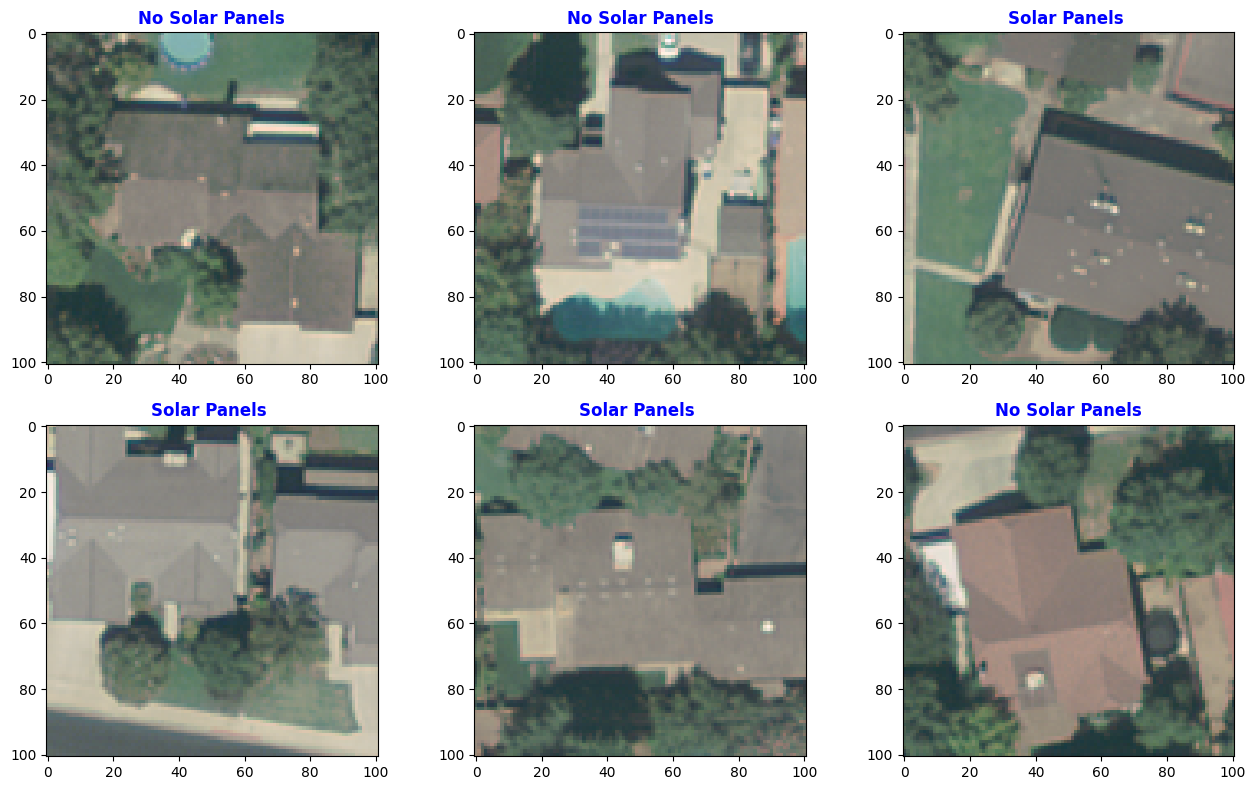

In [ ]:

if isinstance(A, np.ndarray) and A.shape[0] >= 6 and B.size > 0:
    plt.figure(figsize=(13, 8))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(A[i])
        if B[i] == 0:
            title = 'No Solar Panels'
        else:
            title = 'Solar Panels '
        plt.title(title, color='b', weight='bold')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough images to display or A is not loaded properly')



In [ ]:
if isinstance(A, np.ndarray):
    print('A shape:', A.shape)
else:
    print('A is not a numpy array')

A shape: (640, 101, 101, 3)


In [ ]:
print('Distribution of y', np.bincount(B)) # 426 labels are '0' and 214 labels are '1'


Distribution of y [426 214]


In [ ]:
A = A / 255.0


In [ ]:

def model_building():
    '''
    Returns a Keras CNN model
    '''

    IMAGE_HEIGHT = 101
    IMAGE_WIDTH = 101
    IMAGE_CHANNELS = 3

    model = Sequential()

    model.add(Conv2D(filters=32,
                     kernel_size=3,
                     activation='relu',
                     input_shape=(IMAGE_HEIGHT,
                                  IMAGE_WIDTH,
                                  IMAGE_CHANNELS)))


    model.add(BatchNormalization())

    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())


    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())


    model.add(GlobalMaxPooling2D())

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:

 # cross-validate CNN model
def cv_performance_assessment(A, B, num_folds, clf, random_seed=1):

    prediction_scores = np.empty(B.shape[0], dtype='object')

    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=random_seed)

    for train_index, val_index in kf.split(A, B):
        A_train, A_val = A[train_index], A[val_index]
        B_train = B[train_index]

        class_weight = {0: 214/640, 1: 426/640}

        # train the classifier
        training = clf.fit(x=A_train,
                           y=B_train,
                           class_weight=class_weight,
                           batch_size=32,
                           epochs=10,
                           shuffle=True,
                           verbose=1)

        y_val_pred_probs = clf.predict(A_val).reshape((-1, ))

        prediction_scores[val_index] = y_val_pred_probs

    return prediction_scores

In [ ]:
# number of subsets of data, where 1 set is used to test the data and other 2 will be used to train it.
num_folds = 3

random_seed = 1

# model_building()
cnn = model_building()

# summary
cnn.summary()

# generate the probabilities
cnn_y_hat_prob = cv_performance_assessment(A, B, num_folds, cnn, random_seed=random_seed)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 99, 99, 32)        896       
                                                                 
 batch_normalization_7 (Bat  (None, 99, 99, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_8 (Bat  (None, 97, 97, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 95, 95, 128)       73856     
                                                                 
 batch_normalization_9 (Bat  (None, 95, 95, 128)      

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv(Training_Labels)
df["predicted_class"] = [1 if pred >= 0.5 else 0 for pred in cnn_y_hat_prob]

fn = np.array(df[(df['label'] == 1) & (df['predicted_class'] == 0)]['id'])
tn = np.array(df[(df['label'] == 0) & (df['predicted_class'] == 0)]['id'])
fp = np.array(df[(df['label'] == 0) & (df['predicted_class'] == 1)]['id'])
tp = np.array(df[(df['label'] == 1) & (df['predicted_class'] == 1)]['id'])


In [ ]:
def show_images(image_ids, num_images, title, color):

    rcParams['figure.figsize'] = 20, 4
    plt.figure()
    n = 1
    for i in image_ids[0:num_images]:
        plt.subplot(1, num_images, n)
        plt.imshow(A[i, :, :, :])
        plt.title('Image id: ' + str(i))
        plt.axis('off')
        n+=1
    plt.suptitle('\n'+title, fontsize=15, color = color, weight = 'bold')
    plt.show()


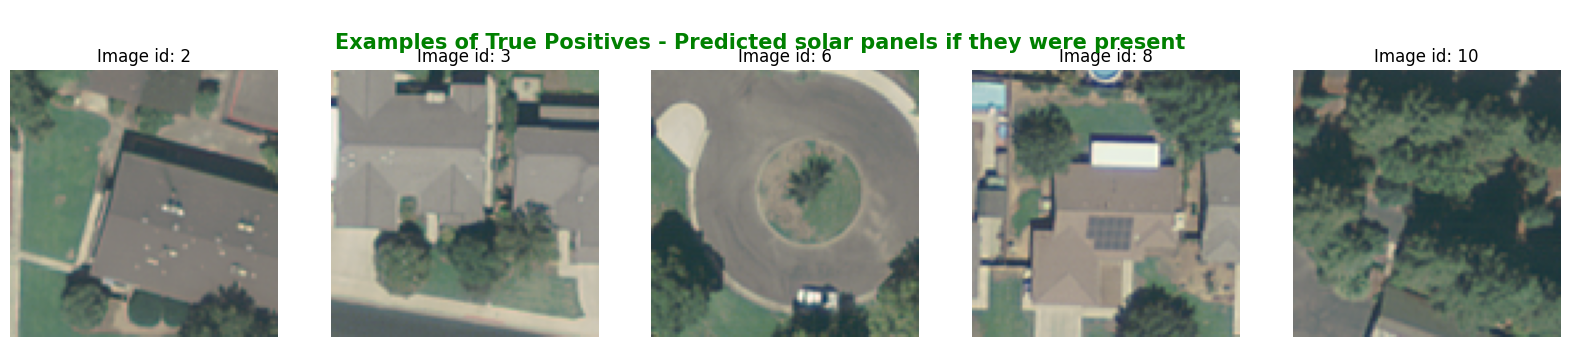

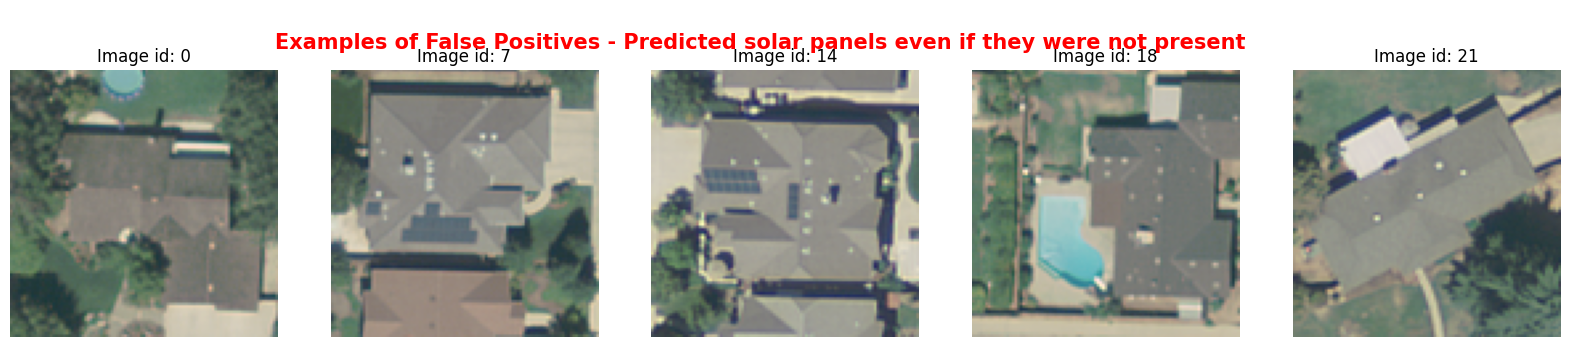

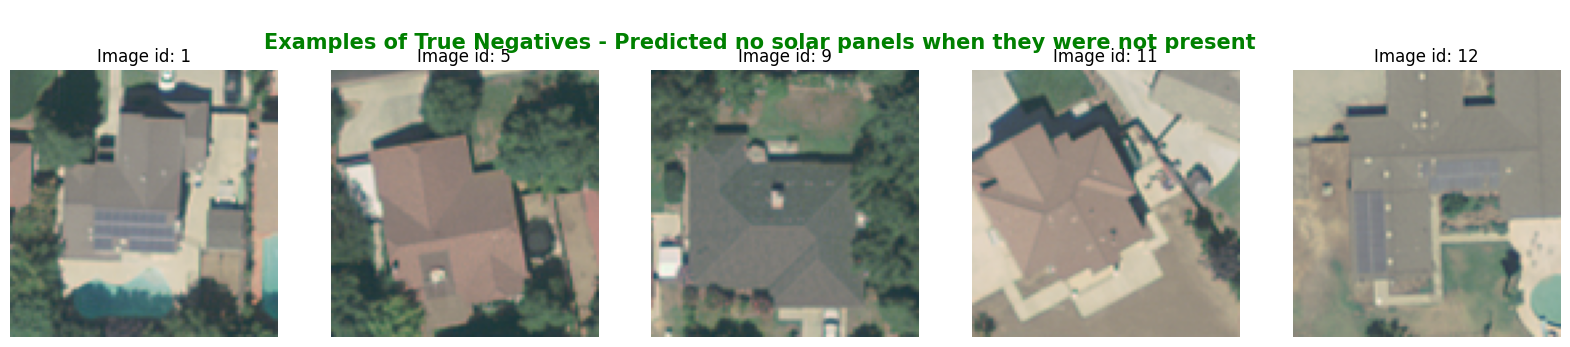

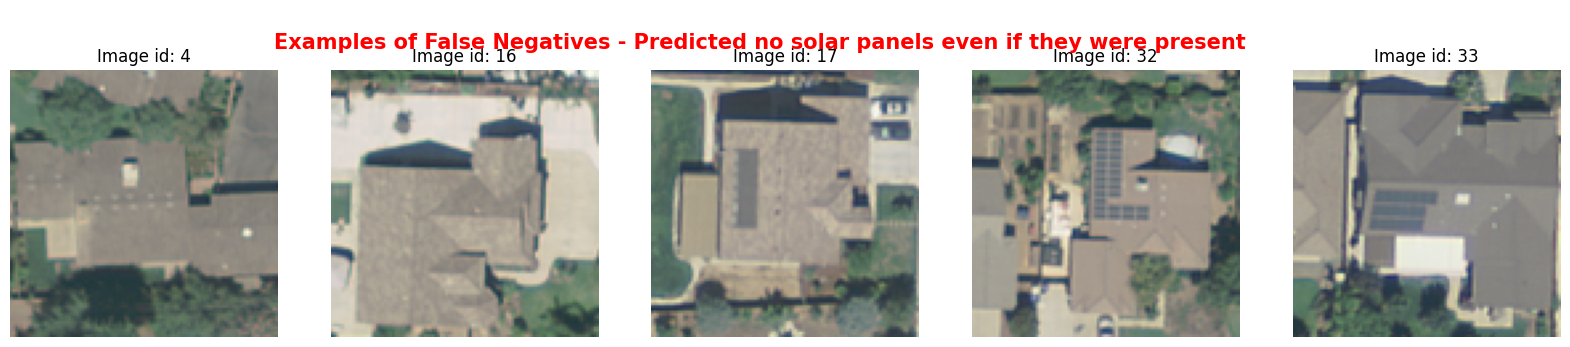

In [ ]:

num_images = 5
show_images(tp, num_images, 'Examples of True Positives - Predicted solar panels if they were present', 'g')
show_images(fp, num_images, 'Examples of False Positives - Predicted solar panels even if they were not present', 'r')
show_images(tn, num_images, 'Examples of True Negatives - Predicted no solar panels when they were not present', 'g')
show_images(fn, num_images, 'Examples of False Negatives - Predicted no solar panels even if they were present', 'r')

In [ ]:
def plot_roc(B_true, B_pred_cnn):

    plt.figure(figsize=(8, 8))

    fpr, tpr, _ = roc_curve(B_true, B_pred_cnn, pos_label=1)
    auc = roc_auc_score(B_true, B_pred_cnn)
    legend_string = 'CNN Model - AUC = {:0.3f}'.format(auc)
    plt.plot(fpr, tpr, color='red', label=legend_string)

    plt.plot([0, 1], [0, 1], '--', color='gray', label='Chance - AUC = 0.5')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()
    plt.title('ROC Curve', fontsize=10)
    pass

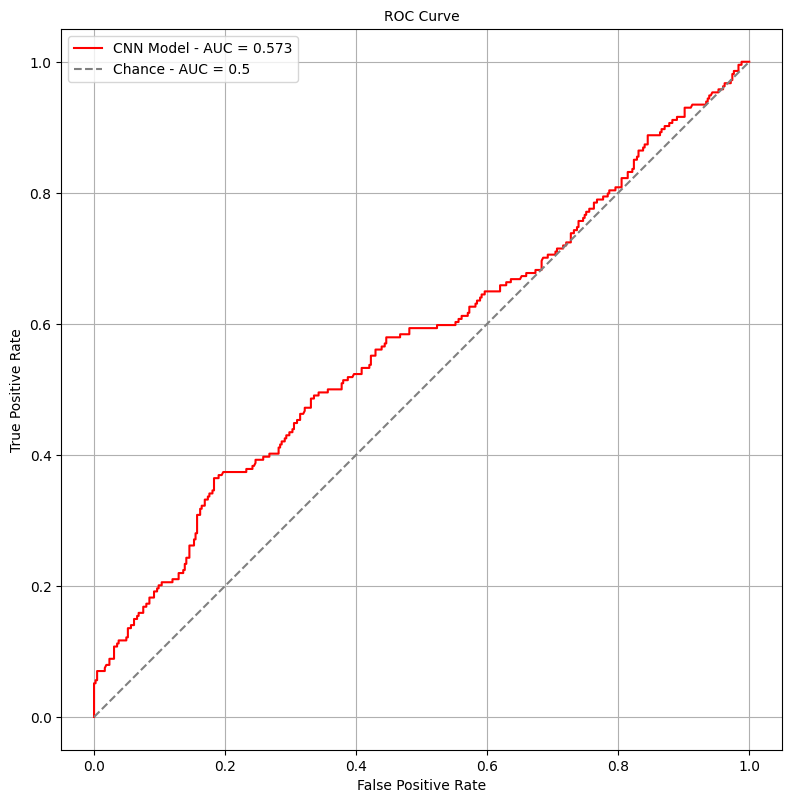

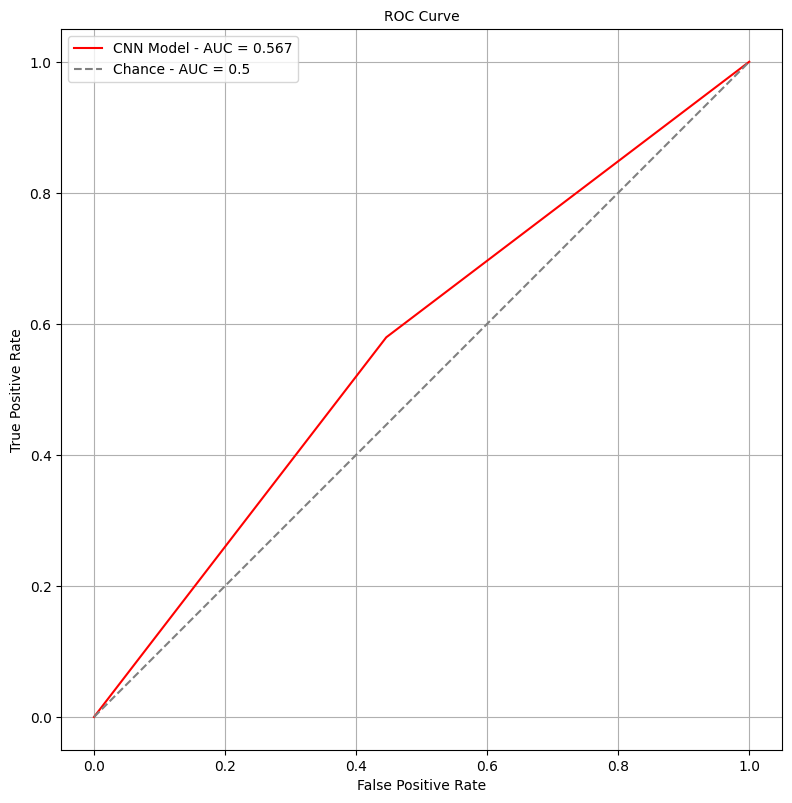

In [ ]:
B_pred = [1 if pred >= 0.5 else 0 for pred in cnn_y_hat_prob]
plot_roc(B,  cnn_y_hat_prob)
plot_roc(B, B_pred)

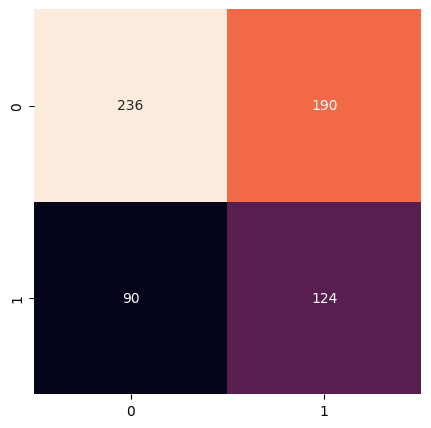

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(B, B_pred), annot = True, cbar = False, fmt='.0f')
plt.show()